In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#reading the dataset

beer=pd.read_csv('beer_train.csv')
beer.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,10-Aug-76,208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [54]:
beer['beer/name'].value_counts()

Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1441
Founders Centennial IPA                    1064
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
                                           ... 
Funky Bitch                                   1
Dubbel Donker                                 1
Bourbon Barrel Quad                           1
Centennial                                    1
Wapping Magna 800                             1
Name: beer/name, Length: 1688, dtype: int64

There are about 1688 unique beers in the dataset.<br>
The 5 most rated beers are: Founders Breakfast Stout, Founders KBS (Kentucky Breakfast Stout), Founders Centennial IPA, Founders Red's Rye PA, Founders Dirty Bastard. This implies that most of the reviewers have tried **Founders'** beers.


In [55]:

beer['beer/style'].value_counts()

American Double / Imperial Stout    4495
American IPA                        3050
American Double / Imperial IPA      2872
Scotch Ale / Wee Heavy              2133
Russian Imperial Stout              2032
                                    ... 
Lambic - Fruit                         6
Berliner Weissbier                     6
Eisbock                                5
BiÃ¨re de Garde                        4
Flanders Red Ale                       2
Name: beer/style, Length: 95, dtype: int64

There are total 95 beer styles in the dataset.<br>
The 5 most reviewed beer styles are: American Double / Imperial Stout,American IPA, American Double / Imperial IPA, Scotch Ale / Wee Heavy, Russian Imperial Stout. Most of which are either a **Stout, IPA or Double**.

In [56]:
beer_name_pivot=pd.DataFrame(beer.groupby('beer/name')['review/overall'].mean())
beer_name_pivot['review_count']=pd.DataFrame(beer.groupby('beer/name')['review/overall'].count())
beer_name_pivot.rename(columns={'review/overall':'avg_overall_review'},inplace=True)
beer_name_pivot.sort_values('avg_overall_review',ascending=False).head(10)

,avg_overall_review,review_count
beer/name,,
Javaspresso Nitro Stout,5.0,1
Saisonnaire,5.0,1
Cauldron Brew,5.0,1
Farmhouse Ale,5.0,2
Biere Blanche,5.0,1
Limping Mallard,5.0,1
Ackerman's Imperial Double Stout (Winterfest Replicale 2011),5.0,1
BourbonDog ESB,5.0,1
Gene's American Brown Ale,5.0,1


As we can see there are a number of beers that are rated high even after taking average because of the review count being less.

<AxesSubplot:xlabel='avg_overall_review', ylabel='review_count'>

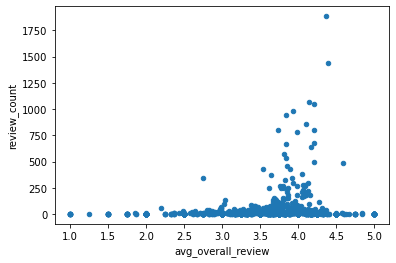

In [44]:
beer_name_pivot.plot.scatter(x='avg_overall_review',y='review_count')

Based on the plot we will set a threshold for review count. Now we would consider only those beers that have review count more than 200 to find the popular beers based on average review.

**Finding Popular Beers based on average rating and review count above 250**

In [62]:
# Finding Popular Beers based on average rating and review count above 250

beer_name_pivot[beer_name_pivot['review_count']>=250].sort_values('avg_overall_review', ascending=False).head(10)

,avg_overall_review,review_count
beer/name,,
Founders CBS Imperial Stout,4.584025,482
Founders KBS (Kentucky Breakfast Stout),4.388619,1441
Founders Breakfast Stout,4.360595,1883
Founders Porter,4.212593,675
Founders Imperial Stout,4.210559,805
Founders Red's Rye PA,4.210276,1051
Founders Harvest Ale,4.209350,492
B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,4.172170,636
Founders Centennial IPA,4.148966,1064


As we can observe, most popular beers are **Founders**.

In [66]:
# Similarly for beer/style

beer_style_pivot=pd.DataFrame(beer.groupby('beer/style')['review/overall'].mean())
beer_style_pivot['review_count']=pd.DataFrame(beer.groupby('beer/style')['review/overall'].count())
beer_style_pivot.rename(columns={'review/overall':'avg_overall_review'},inplace=True)
beer_style_pivot.sort_values('avg_overall_review',ascending=False).head(10)

,avg_overall_review,review_count
beer/style,,
American Double / Imperial Stout,4.326919,4495
English Barleywine,4.233333,90
Keller Bier / Zwickel Bier,4.184211,19
Russian Imperial Stout,4.168061,2032
Rye Beer,4.162362,1355
Munich Helles Lager,4.096115,489
English Dark Mild Ale,4.062500,16
Baltic Porter,4.047030,404
American IPA,4.045082,3050


<AxesSubplot:xlabel='avg_overall_review', ylabel='review_count'>

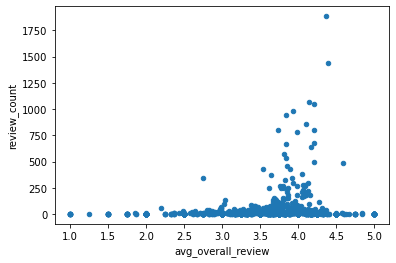

In [64]:
beer_name_pivot.plot.scatter(x='avg_overall_review',y='review_count')

**Finding popular beer styles based on review count and high average review**

In [73]:
#Finding popular beer styles based on review count and high average review

beer_style_pivot[beer_style_pivot['review_count']>=200].sort_values('avg_overall_review', ascending=False).head(10)

,avg_overall_review,review_count
beer/style,,
American Double / Imperial Stout,4.326919,4495
Russian Imperial Stout,4.168061,2032
Rye Beer,4.162362,1355
Munich Helles Lager,4.096115,489
Baltic Porter,4.047030,404
American IPA,4.045082,3050
American Porter,4.026675,1687
Belgian Strong Pale Ale,3.959459,444
Doppelbock,3.937220,669


**Analysing beer/ABV feature**

<AxesSubplot:ylabel='Frequency'>

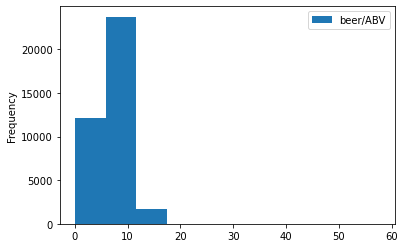

In [80]:
beer[['beer/ABV']].plot.hist(bins=10)

In [81]:
beer['beer/ABV'].describe()

count    37500.000000
mean         7.403725
std          2.318145
min          0.100000
25%          5.400000
50%          6.900000
75%          9.400000
max         57.700000
Name: beer/ABV, dtype: float64

**Which beer has the highest ABV**

In [88]:
# Which beer has the highest ABV

beer_ABV=pd.DataFrame(beer.groupby('beer/name')['beer/ABV'].mean())
beer_ABV['review_count']=pd.DataFrame(beer.groupby('beer/name')['beer/ABV'].count())
beer_ABV.sort_values('beer/ABV', ascending=False).head(10)

,beer/ABV,review_count
beer/name,,
SchorschbrÃ¤u Schorschbock 57%,57.70,1
SchorschbrÃ¤u Schorschbock 43%,43.00,2
SchorschbrÃ¤u Schorschbock 40%,39.44,1
SchorschbrÃ¤u Schorschbock 31%,30.86,1
Schorschbock,16.00,4
Schorsch Weizen 16%,16.00,1
Jeffersons Reserve Big Fella Bourbon Barrel Stout,16.00,2
Trafalgar Korruptor,15.00,13
Enrico's Cure,14.50,1


The **Schorschbock** beers have the most highest ABV.

<AxesSubplot:title={'center':'review_count vs beer/ABV'}, xlabel='review_count', ylabel='beer/ABV'>

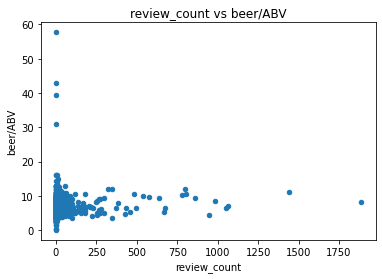

In [89]:
beer_ABV.plot.scatter(x = 'review_count', y = 'beer/ABV', title = 'review_count vs beer/ABV')

We can observe that most of the users have reviewed beers with ABV less than 20. 

**TEXT ANALYSIS based on review/text feature**

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         619 KB

The following NEW packages will be INSTALLED:

  wordcloud          

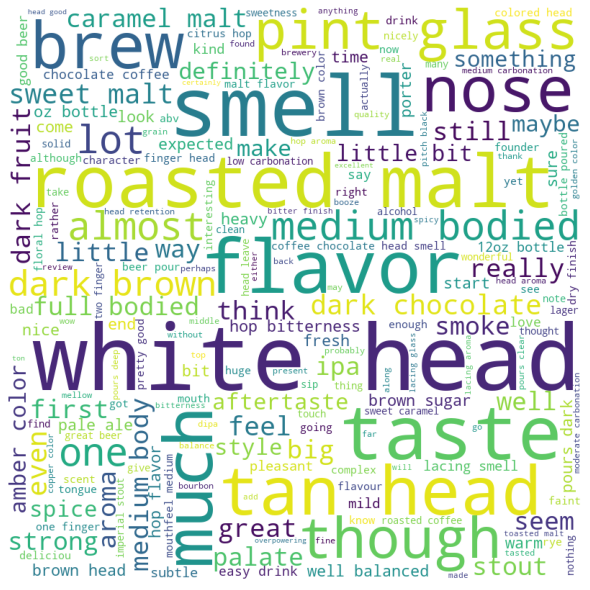

In [93]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in beer['review/text']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

From the word cloud, we can tell that most frequent words in the review/text are: **white, head, roasted, malt, flavor,smell, taste, brew, pint, glass**, etc..

In [94]:
beer['user/profileName'].fillna('Unknown_User', inplace=True)

**The Top Users who have Reviewed the Most**

In [97]:
#the top users who have reviewed the most

user_name_pivot=pd.DataFrame(beer.groupby('user/profileName')['review/overall'].mean())
user_name_pivot['review_count']=pd.DataFrame(beer.groupby('user/profileName')['review/overall'].count())
user_name_pivot.rename(columns={'review/overall':'avg_overall_review'},inplace=True)
user_name_pivot.sort_values('review_count',ascending=False).head(10)

,avg_overall_review,review_count
user/profileName,,
northyorksammy,3.507092,141
BuckeyeNation,3.768182,110
mikesgroove,4.141304,92
ChainGangGuy,3.595238,84
MasterSki,3.801205,83
oberon,3.882716,81
akorsak,3.907407,81
barleywinefiend,3.756250,80
Thorpe429,3.854430,79
